In [105]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from joblib import dump, load
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [12]:
cwd = '/zhome/27/c/138037/share'
#model_list = os.listdir(cwd + '/Models')
#print(model_list)

In [25]:
train = np.load('train_featuredata.npy')
test = np.load('test_featuredata.npy')
X_train, X_test = train[:,:-1], test[:,:-1]
y_train, y_test = train[:,-1], test[:,-1]

In [35]:
n_estimators = 100
lr = 0.1
max_depth = 1
seed = 10
max_iter = 500
early_stopping = False

In [21]:
model = str(f'n_est={n_estimators}-lr={lr}-max-depth={max_depth}-seed={seed}')
model_hist = str(f'HistGBDT-max_iter={max_iter}-early_stopping={str(early_stopping)}-seed={seed}')
clf = load('../Models/' + model + '.joblib')
clf_hist = load('../Models/' + model_hist + '.joblib')

In [37]:
clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr, max_depth=max_depth, random_state=seed).fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)

In [38]:
clf_hist = HistGradientBoostingClassifier(max_iter=max_iter, random_state=seed, early_stopping=early_stopping, learning_rate=lr ).fit(X_train, y_train)
clf_hist_score = clf_hist.score(X_test, y_test)

In [81]:
clf_hist.predict(X_test[6000].reshape(-1,12)).shape

(1,)

In [39]:
print('Height, Width, Depth, Size, intensity[0]-[6], Nearest cluster mean') 
print(f'GradientBoostingDecessionTree: \n score: {clf_score} \n feature importance: {clf.feature_importances_} \n \nHistGradientBoostingDecessionTree: \n score: {clf_hist_score}') #\n feature importance: {clf_hist.feature_importances_}')

Height, Width, Depth, Size, intensity[0]-[6], Nearest cluster mean
GradientBoostingDecessionTree: 
 score: 0.8821390698379034 
 feature importance: [0.18308653 0.23332156 0.00290214 0.02553493 0.0387962  0.03152474
 0.0308215  0.0108921  0.07289873 0.00063688 0.00903318 0.36055152] 
 
HistGradientBoostingDecessionTree: 
 score: 0.9639448568398727


In [90]:
true = np.arra([(1)])
pred = np.empty(1)
count = 0

for X in X_test:
    true = np.append(true, [y_test[count]], axis=0)
    pred = np.append(pred, clf_hist.predict(X.reshape(-1,12)), axis=0) 
    count += 1

In [99]:
pred = clf_hist.predict(X_test.reshape(X_test.shape[0],12))

In [40]:
dump(clf, '../Models/' + model + '.joblib') 
dump(clf_hist, '../Models/' + model_hist + '.joblib')

['../Models/HistGBDT-max_iter=1000-early_stopping=False-seed=10.joblib']

In [103]:
confusion_matrix(y_test, pred)

array([[2916,    0,   50,    5,   30],
       [   8,   87,    1,    2,    2],
       [  57,    0, 1417,   18,    8],
       [   5,    0,   11,  869,   15],
       [   8,    2,    1,   15, 1074]])

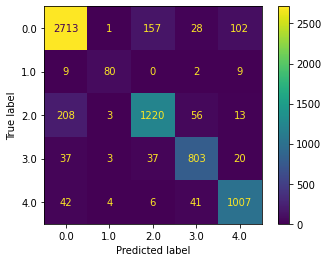

In [104]:
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [106]:
balanced_accuracy_score(y_test,pred)

0.9456523933099741